# 4. Implementación de algoritmos de Machine Learning no supervisados (DBSCAN)

<a href="https://colab.research.google.com/github/miguel-solarte/Curso_joven_investigador_ITM_2024/blob/main/Seccion4_DBSCAN.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una vez analizados los algoritmos K-means, que genera grupos a partir de la distancia entre centroides y los puntos del conjunto de datos, y Spectral Clustering, que forma grupos basándose en información obtenida con vectores propios, ahora analizaremos el algoritmo de *Agrupamiento Espacial Basado en Densidad de Aplicaciones con Ruido* (DBSCAN por sus siglas en inglés) . Este algoritmo tiene un enfoque diferente para la generación de grupos, basado en la densidad.

El criterio de DBSCAN se centra en determinar si un punto $p$ del conjunto de datos tiene una cantidad minima definida (llamada $minspts$) de otros puntos a su alrededor, cuya distancia sea menor que un radio definido desde el punto $p$ (llamado $eps$). Estos puntos pertenecerán al grupo al cual se haya asignado el punto $p$. Luego, se seleccionará un punto alrededor de $p$ que cumpla estos criterios y se repetirá el mismo proceso.

#### Conceptos clave de DBSCAN:

1. Las variables $eps$ y $minspts$ son definidas por el usuario.
2. Los puntos alrededor de un punto $p$ del conjunto de datos que tengan una distancia menor o igual que $eps$ se denominarán vecindad de $p$ y se denotarán como $Neps(p)$
3. Un punto $p$ se llama punto núcleo si $Neps(p) \geq minspts$
4. Los puntos que pertenezcan a $Neps(p)$ y donde $p$ sea un punto núcleo, se asignarán al mismo grupo que su punto núcleo.
5. Un punto $p$ que *ya haya sido asignado* a un grupo y no cumpla con $Neps(p) \geq minspts$ se llamará punto borde.
6. Un punto $p$ que *no ya haya sido asignado* a un grupo y no cumpla con $Neps(p) \geq minspts$ será considerado como ruido.

## 4.1 Implementación del algoritmo DBSCAN

Los conceptos mencionados anteriormente proporcionan las bases para implementar el algoritmo DBSCAN. A continuación, se explicará la composición del código y, al final, se pondrá a prueba.

#### 1. Importamos las librerías necesarias y generamos el conjunto de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

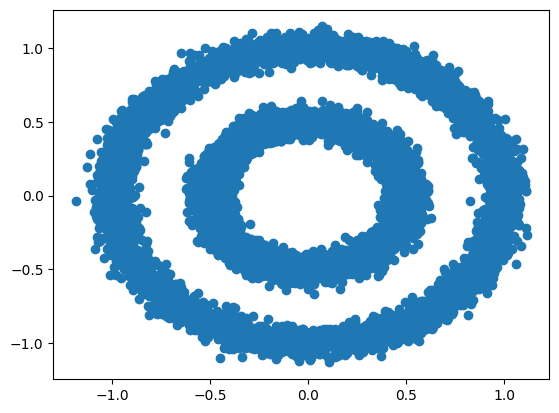

In [2]:
carac_circulos, _ = make_circles(n_samples = 10000, factor = 0.5, noise = 0.05, random_state = 42)
plt.scatter(carac_circulos[:,0], carac_circulos[:,1])
plt.show()

#### 2. Creamos una función que determine si un punto no ha sido asignado a un grupo.

In [3]:
def unclassified_clusterID(point_id, clusterId):
    return clusterId[point_id] == 0

#### 3. Creamos una función que determine si un punto es clasificado como ruido.

In [4]:
def classified_listnoise(point_id, list_noise):
    return point_id in list_noise

#### 4. Creamos una función que calcule la densidad de un punto basada en el concepto clave número 2.

In [5]:
def neighborhood_eps(toy_dataset, point, eps):
    N_eps = []
    for i in range(toy_dataset.shape[0]):
        dist = np.linalg.norm(point - toy_dataset[i])
        if dist <= eps:
            N_eps.append(i)
        
    return N_eps

#### 5. Creamos una función que permita expandir los grupos siguiendo los conceptos clave 2, 3, 5 y 6.

In [6]:
def expandcluster(toy_dataset, point_id, clusterId, eps, minpts, list_noise, n):
    N_eps = neighborhood_eps(toy_dataset, toy_dataset[point_id], eps)
    if len(N_eps) < minpts:
        return False
    else:
        clusterId[point_id] = n  
        N_eps.remove(point_id)
        list_noise.remove(point_id)

        while len(N_eps) != 0:
        
            currentP = N_eps[0]
            result = neighborhood_eps(toy_dataset, toy_dataset[currentP], eps)
            if len(result) >= minpts:
                for i in result:
                    if unclassified_clusterID(i, clusterId) and classified_listnoise(i, list_noise):
                        #if unclassified_clusterID(i, clusterId):
                        N_eps.append(i)
                        clusterId[i] = n
            N_eps.remove(currentP)    

        return True

#### 6. Creamos una función principal que se encargará de llamar a las demás funciones para ejecutar el algoritmo DBSCAN.

In [7]:
def DBSCAN(toy_dataset, eps, minpts):

    n = 0

    clusterId = np.zeros(toy_dataset.shape[0])
    list_noise = list(range(toy_dataset.shape[0]))

    for point_id in range(toy_dataset.shape[0]):
        
        if unclassified_clusterID(point_id, clusterId):
            n += 1
            if expandcluster(toy_dataset, point_id, clusterId, eps, minpts, list_noise, n):
                clusterId = clusterId

    return clusterId

#### 7. Ejecutemos el algoritmo.

In [8]:
eps = 0.05

minpts = 5

In [9]:
lab = DBSCAN(carac_circulos, eps, minpts)

#### 8. Graficamos los resultados

Los resultados obtenidos al ejecutar el algoritmo DBSCAN muestran dos grupos: uno representado con color amarillo y otro con color morado. Los puntos en azul son aquellos que el algoritmo clasificó como ruido. Es importante aclarar que los resultados pueden cambiar si variamos los valores de ``eps`` y ``minpts``. Además, es crucial ajustar estos parámetros según el tipo de conjunto de datos para obtener resultados adecuados.

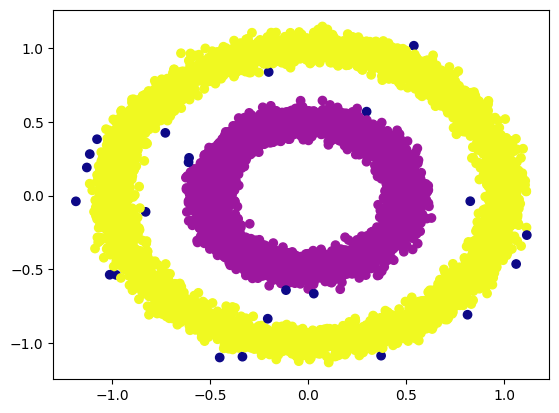

In [10]:
plt.scatter(carac_circulos[:,0], carac_circulos[:,1], c = lab, cmap='plasma')
plt.show()

## 4.2 Implementación del algoritmo DBSCAN con la librería Scikit-learn

Asi como los algortimos K-means y spectral clustering los podemos encontrar implementados en Scikit-learn, también DBSCAN lo está. Para ello es necesario implementar 3 simples pasos.

#### 1. Importamos DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

#### 2. Instanciamos la clase DBSCAN y ejecutamos el algoritmo

Aunque la clase DBSCAN cuenta con varios atributos, podemos utilizarlo con solo dos atributos principales: ``eps``, que hace referencia al $eps$ mencionado anteriormente, y ``min_samples``, que corresponde a $minpts$

In [12]:
dbscan = DBSCAN(eps = 0.05, min_samples = 5)

Para ejecutar nuestro algoritmo, es necesario utilizar el método ``fit()``. Este método requiere, como parámetro, el arreglo de características generado.

In [13]:
dbscan.fit(carac_circulos)

DBSCAN(eps=0.05)

El atributo ``labels_`` nos retorna un arreglo que indica a qué grupo pertenece cada punto y cómo son detectados los puntos de ruido.

In [14]:
labels_dbscan = dbscan.labels_

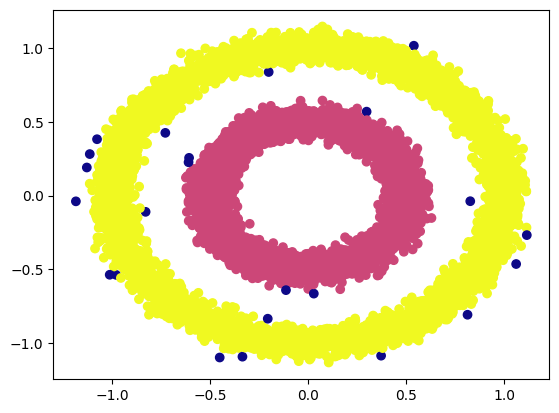

In [15]:
plt.scatter(carac_circulos[:,0], carac_circulos[:,1], c = labels_dbscan, cmap='plasma')
plt.show()

Una vez implementado el algoritmo DBSCAN con la librería Scikit-learn, podemos concluir esta última sección del curso. Aunque este sea el final del curso, existen otros algoritmos de agrupamiento que se pueden explorar junto con sus explicaciones en la documentación de Scikit-learn. https://scikit-learn.org/stable/index.html.

# Retos

#### 1. Probar DBSCAN con otros tipos de datos vistos en la sección 1 o creados por usted

In [16]:
#Código

#### 2. Consultar la documentación proporcionada por Scikit-learn sobre DBSCAN para identificar otros atributos que se pueden utilizar al instanciar DBSCAN. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [17]:
#Código